<a href="https://colab.research.google.com/github/DJCordhose/ml-resources/blob/main/notebooks/time-series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forecasting Time Series data

* Idea of application and some code taken from, and also OPSD time series data set explained here: https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/
* Some code and approaches from: https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/
* Nice tutorial: https://www.tensorflow.org/tutorials/structured_data/time_series

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20, 8)

In [3]:
import pandas as pd
import numpy as np

In [4]:
# for local
# url = 'opsd_germany_daily.csv'

# for colab
url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'

time_series_df = pd.read_csv(url, 
                             sep=',', 
                             index_col=0, # you can use the date as the index for pandas
                             parse_dates=[0]) # where is the time stamp?

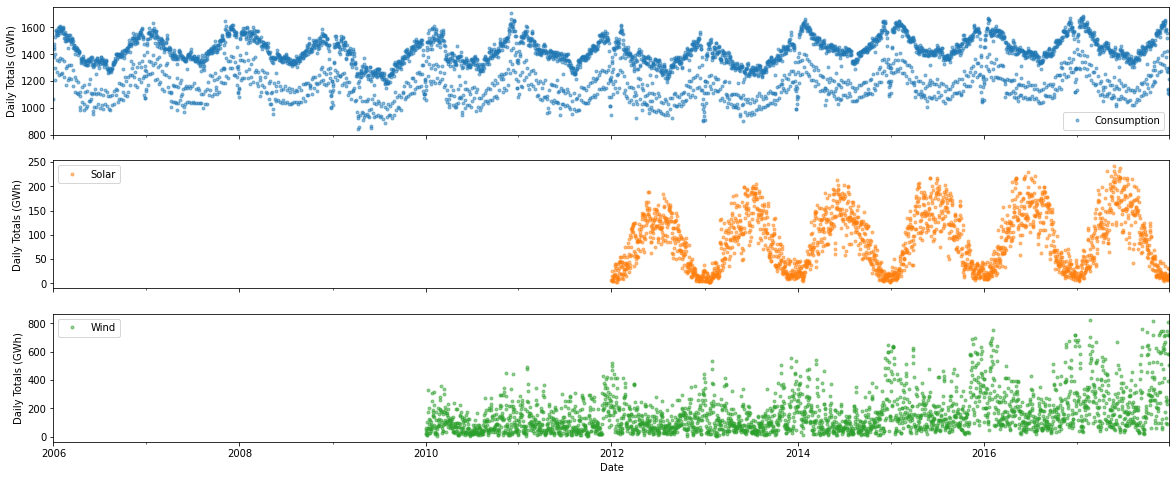

In [5]:
cols_plot = ['Consumption', 'Solar', 'Wind']

axes = time_series_df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

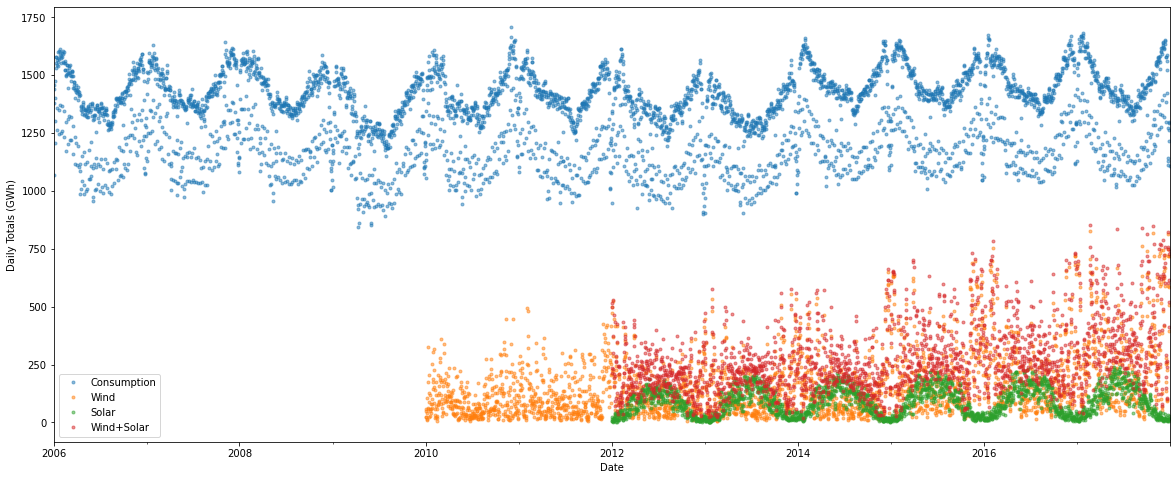

In [6]:
axes = time_series_df.plot(marker='.', alpha=0.5, linestyle='None')
plt.ylabel('Daily Totals (GWh)');

## Pandas is great for working on time series with dates

In [7]:
time_series_df.shape

(4383, 4)

In [8]:
time_series_df.describe()

,Consumption,Wind,Solar,Wind+Solar
count,4383.000000,2920.000000,2188.000000,2187.000000
mean,1338.675836,164.814173,89.258695,272.663481
std,165.775710,143.692732,58.550099,146.319884
min,842.395000,5.757000,1.968000,21.478000
25%,1217.859000,62.353250,35.179250,172.185500
50%,1367.123000,119.098000,86.407000,240.991000
75%,1457.761000,217.900250,135.071500,338.988000
max,1709.568000,826.278000,241.580000,851.556000


In [9]:
# just january 2017
time_series_df['2017-01']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  


,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-01-01,1130.413,307.125,35.291,342.416
2017-01-02,1441.052,295.099,12.479,307.578
2017-01-03,1529.990,666.173,9.351,675.524
2017-01-04,1553.083,686.578,12.814,699.392
2017-01-05,1547.238,261.758,20.797,282.555
2017-01-06,1501.795,115.723,33.341,149.064
2017-01-07,1405.145,252.307,8.387,260.694
2017-01-08,1301.011,41.261,4.991,46.252
2017-01-09,1604.348,190.983,7.070,198.053


In [10]:
# exactly what you think it does
time_series_df['2017-01-01': '2017-01-05']

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-01-01,1130.413,307.125,35.291,342.416
2017-01-02,1441.052,295.099,12.479,307.578
2017-01-03,1529.990,666.173,9.351,675.524
2017-01-04,1553.083,686.578,12.814,699.392
2017-01-05,1547.238,261.758,20.797,282.555


## Can we predict each day's consumption from its past?

### We train on the years 2006 - 2016 and validate on 2017

In [11]:
consumption = time_series_df['Consumption'].to_numpy()
consumption.shape

(4383,)

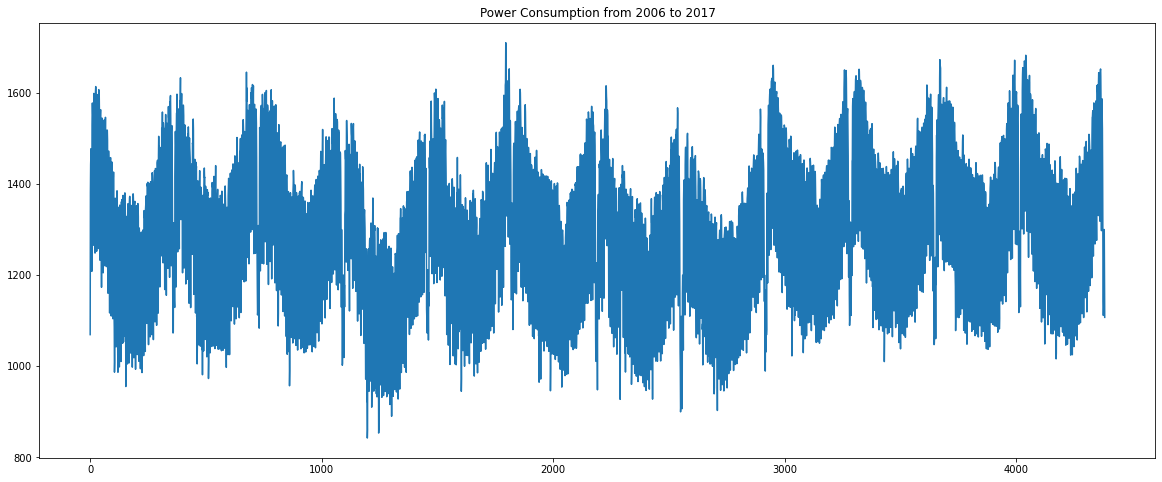

In [12]:
plt.title('Power Consumption from 2006 to 2017')
plt.plot(consumption);

## Statistical Methods directly geared towards forecasting

_Statistical Methods are often favorable: https://twitter.com/togelius/status/1173272424177119233_

* https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/
* https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b#targetText=Time%20series%20forecasting%20is%20the,forecasting%20retail%20sales%20time%20series.
* https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/
* https://research.fb.com/prophet-forecasting-at-scale/

https://www.statsmodels.org
* https://www.statsmodels.org/stable/examples/index.html#stats
* https://www.statsmodels.org/stable/examples/notebooks/generated/tsa_arma_0.html
* https://www.statsmodels.org/stable/tsa.html


_Brush up your statistical skills: https://seeing-theory.brown.edu/basic-probability/index.html_

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


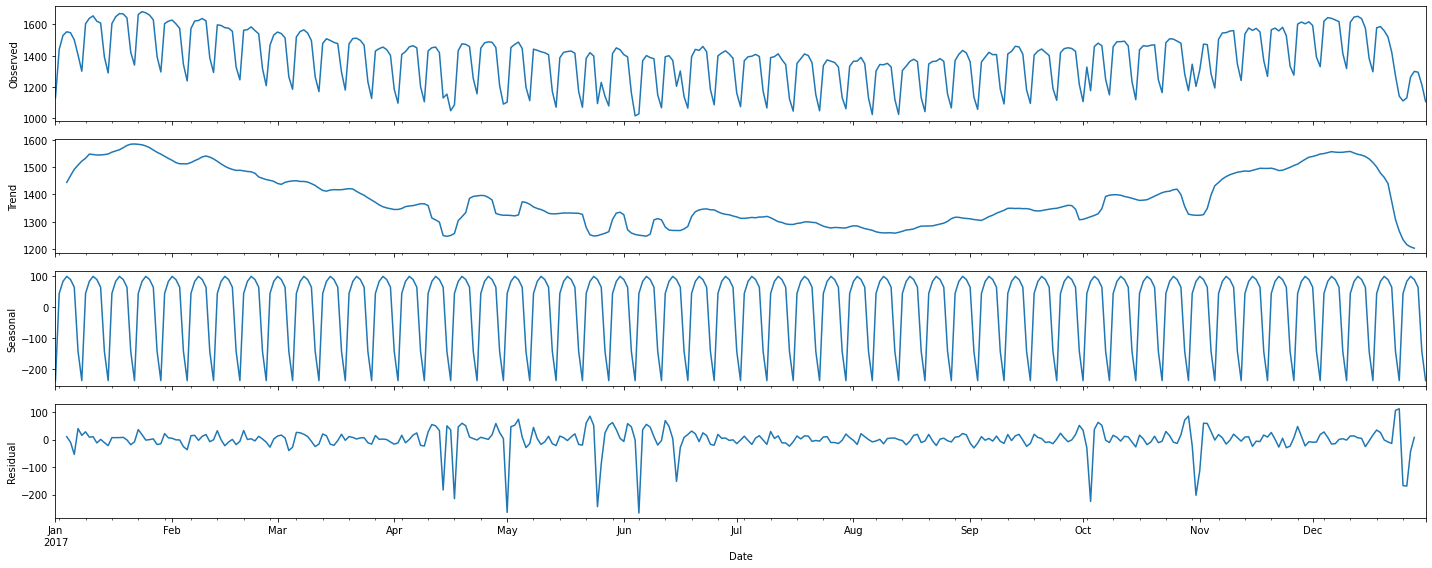

In [13]:
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(time_series_df['2017']['Consumption'], model='additive')
decomposition.plot();

In [14]:
# derived from here: https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

### How much of the past would we like for each individual prediction?

In [15]:
#@title Prediction from n past steps { run: "auto", display-mode: "both" }

# https://colab.research.google.com/notebooks/forms.ipynb

n_steps_in = 30 #@param {type:"slider", min:1, max:100, step:1}
n_steps_out = 1

X, Y = split_sequence(consumption, n_steps_in, n_steps_out)
X.shape, Y.shape

((4353, 30), (4353, 1))

In [16]:
X[0], Y[0]

(array([1069.184, 1380.521, 1442.533, 1457.217, 1477.131, 1403.427,
        1300.287, 1207.985, 1529.323, 1576.911, 1577.176, 1553.28 ,
        1545.002, 1359.945, 1265.475, 1563.738, 1598.303, 1572.984,
        1558.29 , 1540.604, 1348.188, 1248.111, 1569.691, 1603.252,
        1613.312, 1601.673, 1586.065, 1373.03 , 1252.215, 1554.722]),
 array([1575.129]))

In [17]:
# reshape from [samples, timesteps] to [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
X.shape

(4353, 30, 1)

In [18]:
# we do a special test / train split, 
# we see how well we can predict 2017 as test/validation 

X_train = X[:-365]
Y_train = Y[:-365]

X_test = X[-365:]
Y_test = Y[-365:]

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((3988, 30, 1), (3988, 1), (365, 30, 1), (365, 1))

## Baslines

### Rolling mean baseline

In [19]:
def rolling_mean_baseline(history):
  return np.mean(history, axis=1)

In [20]:
Y_pred_baseline_rolling = rolling_mean_baseline(X)
Y_pred_baseline_rolling.shape

(4353, 1)

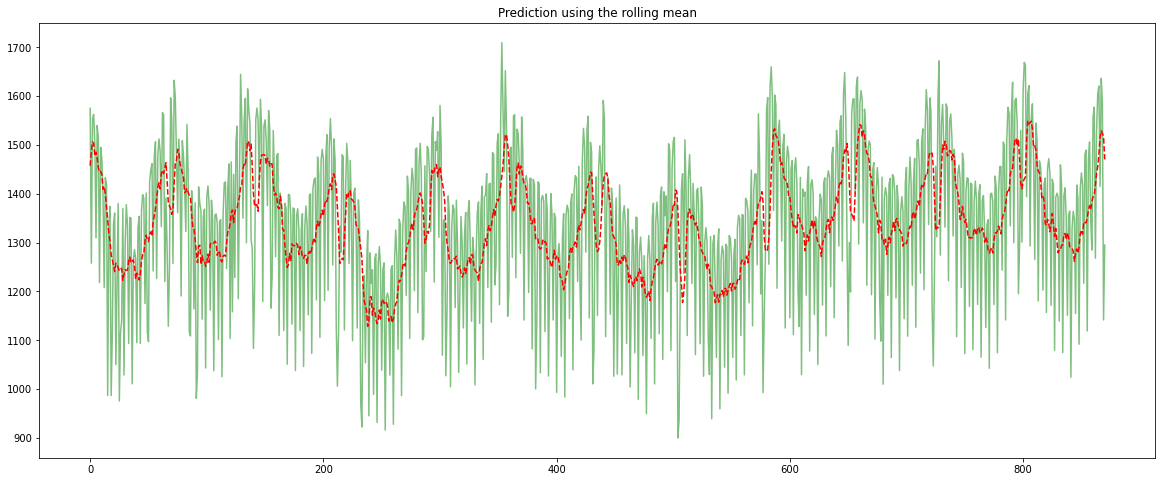

In [21]:
# this gets really crowded, using a stride, makes it more readable
stride = 5

plt.plot(consumption[n_steps_in::stride], alpha=0.5, color='g')
plt.plot(Y_pred_baseline_rolling[::stride], color='r', ls='dashed')

plt.title('Prediction using the rolling mean');


### R2 Metric: This looks quite good, but can we express this as a number?

* R^2 score, the closer to 1 the better
* loosely speaking: how much better is this than predicting the constant mean
* 0 would mean just as good
* 1 is perfect
* neg. would mean even worse
* it can become arbitrarily bad

https://en.wikipedia.org/wiki/Coefficient_of_determination


In [22]:
from sklearn.metrics import r2_score

r2_score(Y, Y_pred_baseline_rolling)

0.20452811776631852

### Baseline: Previous Value

In [23]:
def previous_value_baseline(history):
  return history[:, -1]

In [24]:
Y_pred_baseline_previous_value = previous_value_baseline(X)
Y_pred_baseline_previous_value.shape

(4353, 1)

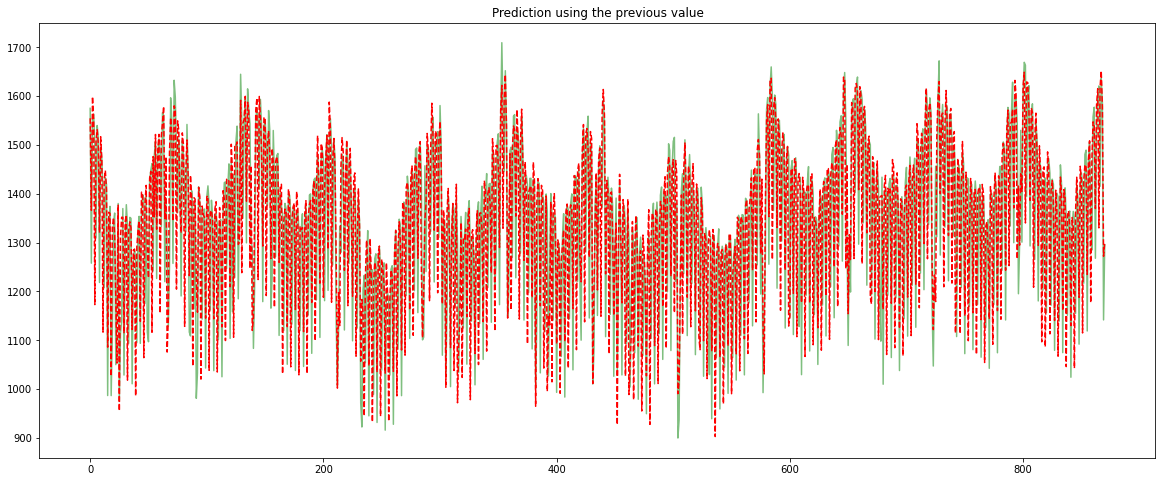

In [25]:
# this gets really crowded, using a stride, makes it more readable
stride = 5

plt.plot(consumption[n_steps_in::stride], alpha=0.5, color='g')
plt.plot(Y_pred_baseline_previous_value[::stride], color='r', ls='dashed')
plt.title('Prediction using the previous value');

### This looks good at first sight, but wait for the R2 score

It is (obviously) always off by one

In [26]:
from sklearn.metrics import r2_score

r2_score(Y, Y_pred_baseline_previous_value)

0.18305610815179718

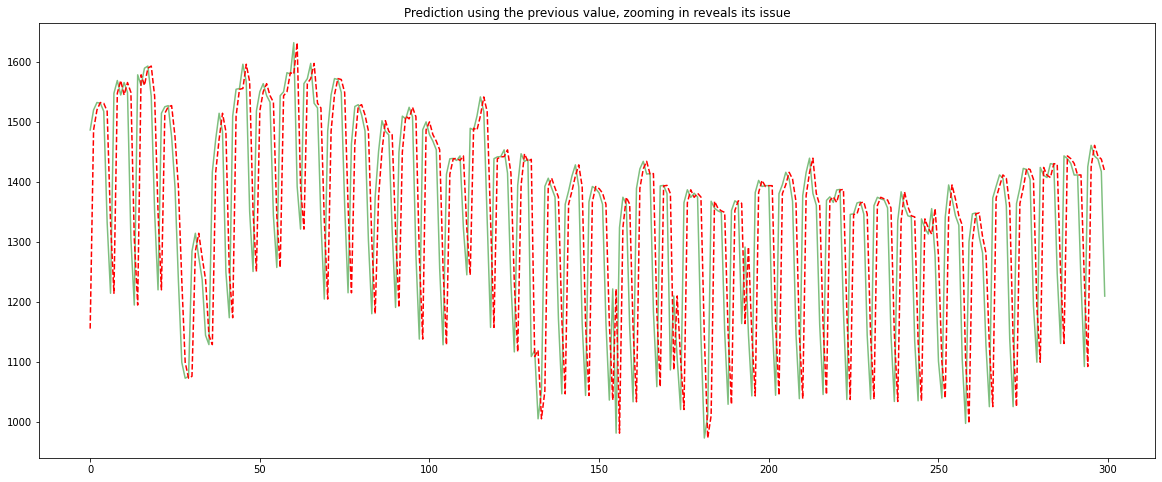

In [27]:
# this gets really crowded, using a stride, makes it more readable
stride = 1
# too crwoded, zoom in
window_start = 300
window_end = 600

plt.plot(consumption[n_steps_in+window_start:n_steps_in+window_end:stride], alpha=0.5, color='g')
plt.plot(Y_pred_baseline_previous_value[window_start:window_end:stride], color='r', ls='dashed')

plt.title('Prediction using the previous value, zooming in reveals its issue');

## Prediction using RNNs and TensorFlow

### Can we beat an r2 score around .20?

In [28]:
# Gives us a well defined version of tensorflow

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [29]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [30]:
# https://github.com/AndreasMadsen/python-lrcurve
!pip install -q lrcurve

     |████████████████████████████████| 71 kB 6.8 MB/s 


In [31]:
from lrcurve import KerasLearningCurve

In [49]:
# https://www.tensorflow.org/addons/api_docs/python/tfa/metrics/RSquare
!pip install -q tensorflow-addons

     |████████████████████████████████| 1.1 MB 16.0 MB/s 


In [50]:
import tensorflow_addons as tfa
tfa.__version__

'0.17.1'

### Just for the reference, what GPU are we running on?

In [32]:
# What kind of GPU are we running on
!nvidia-smi

Thu Jun 23 08:46:42 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Training our model

In [55]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model

model = Sequential()

# two layer model, known to work well
# model.add(GRU(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
# model.add(GRU(100, activation='relu'))

# trains faster, but also works
# model.add(GRU(256, activation='relu', input_shape=(n_steps_in, n_features)))

# one layer SimpleRNN seems to be enough for this data set
model.add(SimpleRNN(256, activation='relu', input_shape=(n_steps_in, n_features)))

# horrible results
# model.add(LSTM(256, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
# model.add(LSTM(64, activation='relu'))

# optional regularization
# model.add(BatchNormalization())
# model.add(Dropout(0.2))

# combines final outputs from RNN into continous output
model.add(Dense(n_steps_out))

model.compile(optimizer='adam', loss='mse', metrics=[tfa.metrics.RSquare()])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 256)               66048     
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 66,305
Trainable params: 66,305
Non-trainable params: 0
_________________________________________________________________


In [56]:
%%time

batch_size = 32
epochs=25

history = model.fit(X_train, Y_train, 
                    batch_size=batch_size, 
                    epochs=epochs,
                    validation_data=(X_test, Y_test),
                    callbacks=[KerasLearningCurve()], 
                    verbose=0)

CPU times: user 1min 34s, sys: 11.6 s, total: 1min 46s
Wall time: 1min 9s


### R2 for all data

In [57]:
loss, r2 = model.evaluate(X, Y, verbose=0)
r2

0.8904708027839661

### R2 for training data

In [37]:
loss, r2 = model.evaluate(X_train, Y_train, verbose=0)
r2

0.8778218030929565

### R2 for validation data

In [38]:
loss, r2 = model.evaluate(X_test, Y_test, verbose=0)
r2

0.8766647577285767

## Let's plot predicted and true over each other

### All data

In [58]:
from sklearn.metrics import r2_score

Y_pred = model.predict(X)
r2_score(Y, Y_pred)

0.8904713561812562

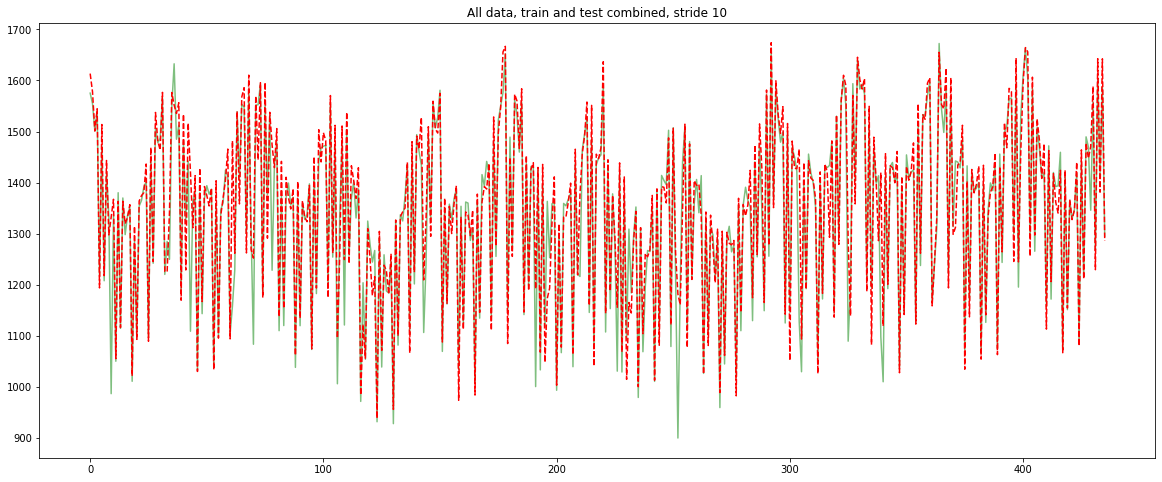

In [40]:
# this gets really crowded, using a stride, makes it more readable
stride = 10

# for the first 90 days we have no prediction, so get rid of them
plt.plot(consumption[n_steps_in::stride], alpha=0.5, color='g')
plt.plot(Y_pred[::stride], color='r', ls='dashed')

plt.title('All data, train and test combined, stride 10');


### Training data for 2016

In [41]:
Y_train_pred = model.predict(X_train)
r2_score(Y_train, Y_train_pred)

0.8778218129443716

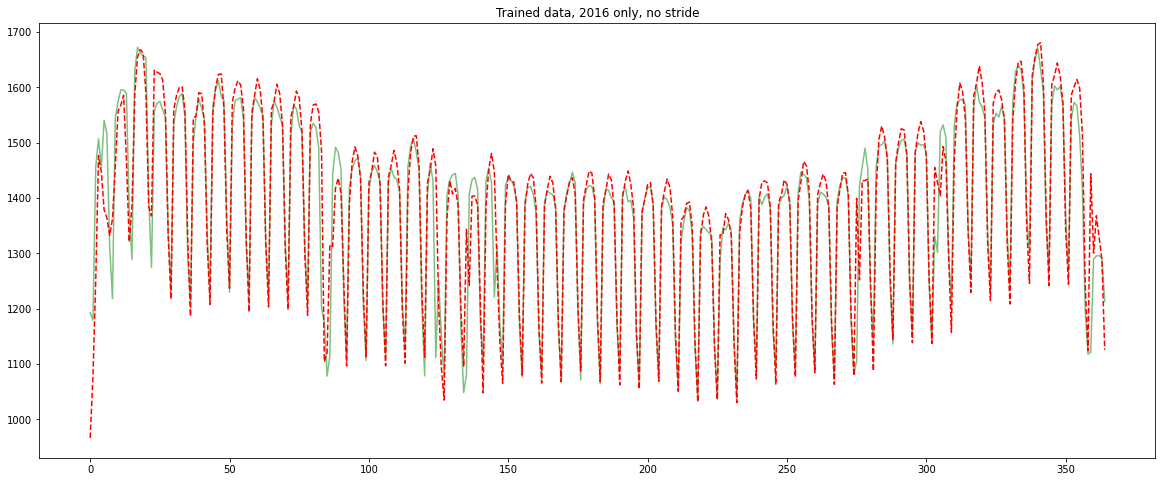

In [42]:
stride = 1

plt.plot(consumption[-2 * 365:-365:stride], alpha=0.5, color='g')
plt.plot(Y_train_pred[-365::stride], color='r', ls='dashed')

plt.title('Trained data, 2016 only, no stride');


### Test data for 2017

In [43]:
Y_test_pred = model.predict(X_test)
r2_score(Y_test, Y_test_pred)

0.8766647532588404

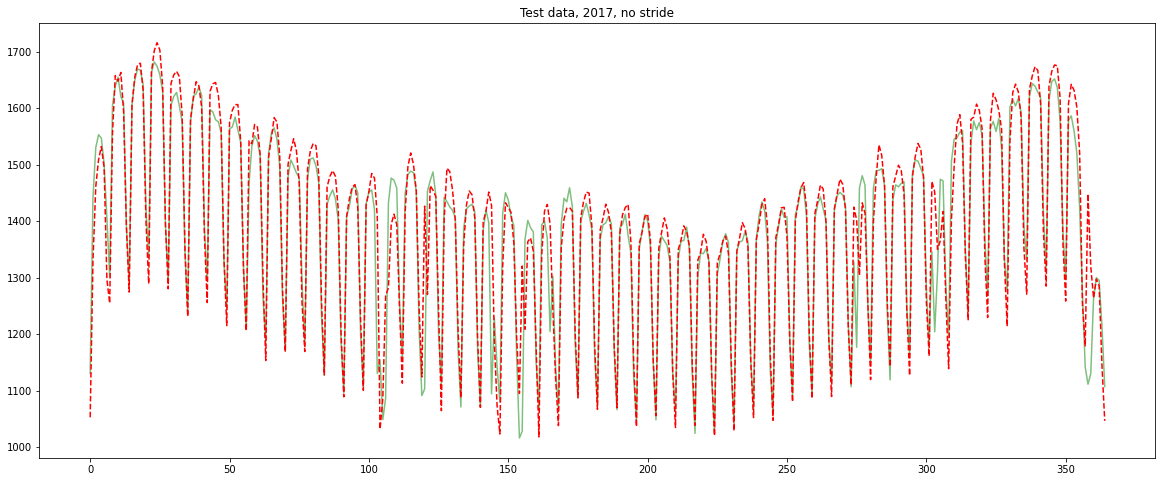

In [44]:
stride = 1

plt.plot(consumption[-365::stride], alpha=0.5, color='g')
plt.plot(Y_test_pred[::stride], color='r', ls='dashed')

plt.title('Test data, 2017, no stride');


### Sanity Check with additional baseline: predicting 2017 from 2016

In [45]:
y_true_2016 = consumption[-2 * 365:-365]
y_true_2016.shape

(365,)

In [46]:
y_true_2017 = consumption[-365::stride]
y_true_2017.shape

(365,)

In [47]:
r2_score(y_true_2017, y_true_2016)

0.15024210947069905

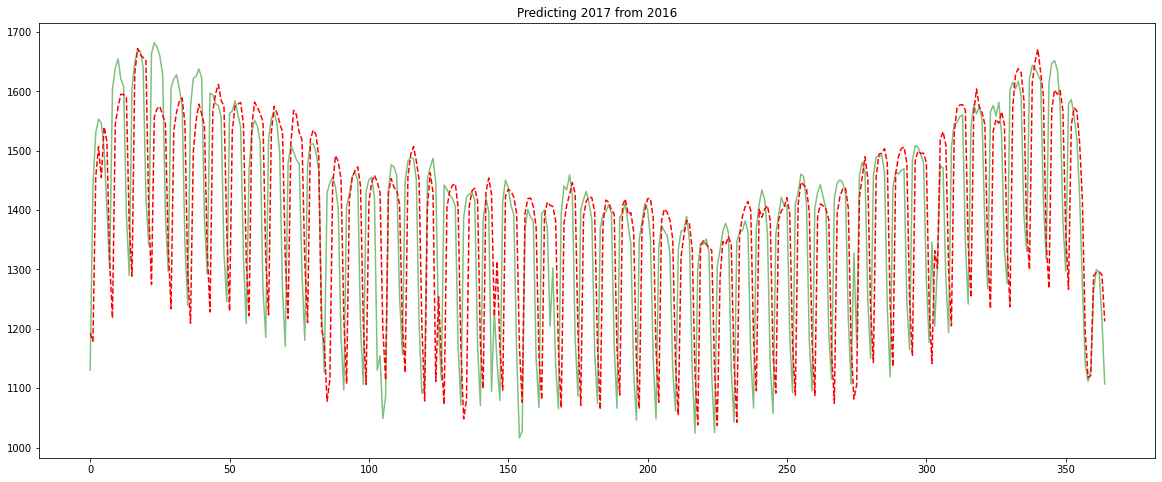

In [48]:
stride = 1

plt.plot(y_true_2017[::stride], alpha=0.5, color='g')
plt.plot(y_true_2016[::stride], color='r', ls='dashed')

plt.title('Predicting 2017 from 2016');


## Observation / Wrap-Up

### overall a pretty good result
* r2 score is pretty promising
* defintely improved over baseline
* no domain knowledge necessary

### no dramatic difference between training and test data
* neither in metrices
* nor in visual inspection

### peaks and valleys are underestimated very often
* but often are the most interesting part
* this seems to be a common problem in time series prediction
* it gets better when we train the model for longer
* also when we increase its capacity
* on the other hand this might counter regularization

## Next Steps
  
### make use of seasonal decomposition
* predict each of the components
  * trend should be pretty easy
  * residual shows clear spices on national holidays
  * remove them
  * the results might be noise only
  * but maybe it is not, train a model on it to check
  
### have a more powerful statistical baseline
* Use more powerful statistical models
  * https://www.statsmodels.org/stable/tsa.html
  * http://www.statsmodels.org/dev/tsa.html
  * http://www.statsmodels.org/dev/vector_ar.html
* MSBVAR (Markov-Switching, Bayesian, Vector Autoregression Models) might beat our model, but
  * needs a lot of modelling 
  * does not seem readily available in the Python world (in R it would be)
  


# More Resources

* How do RNNs work (advanced, but with great visualizations): https://distill.pub/2019/memorization-in-rnns/

* Prophet is made to make predictions in a business context
  * https://facebook.github.io/prophet/
	* You can defined gaps from domain knowledge:  
     * https://facebook.github.io/prophet/docs/non-daily_data.html
     * https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html#additional-regressors
  * https://github.com/ourownstory/neural_prophet   

